In [1]:
from pygor3 import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mdl = get_default_IgorModel("human", "tcr_beta")
fln_scenarios = "delete_me/ttmmpp_output/best_scenarios_counts.csv"
df_scenarios = mdl.get_dataframe_scenarios(fln_scenarios)
df_scenarios.head()

modelpath :  /home/olivares/.local/share/igor/models
modelpath :  /home/olivares/.local/share/igor/models
Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
modelpath :  /home/olivares/.local/share/igor/models
igor_fln_generated_realizations_werr:  delete_me/ttmmpp_output/best_scenarios_counts.csv


,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq
seq_index,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022


## Observables

Define function as observables for scenarios

In [11]:
def f_total_insertions(ps_scenario):
    my_internal = np.zeros(len(mdl.parms['vd_ins']))
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    # my_internal[vd_ins.id] = 1
    # return my_internal 
    return vd_ins.value + dj_ins.value

def f_total_deletions(ps_scenario):
    v_3_del = mdl.realization(ps_scenario, 'v_3_del')
    d_5_del = mdl.realization(ps_scenario, 'd_5_del')
    d_3_del = mdl.realization(ps_scenario, 'd_3_del')
    j_5_del = mdl.realization(ps_scenario, 'j_5_del')
    return v_3_del.value + d_5_del.value + d_3_del.value + j_5_del.value

Using IgorModel.w_average_function_df_scenarios()

In [12]:
mean_insertions = mdl.w_average_function_df_scenarios(f_total_insertions, df_scenarios)
mean_deletions = mdl.w_average_function_df_scenarios(f_total_deletions, df_scenarios)
print(mean_insertions, mean_deletions)

10.202437426325016 15.645906964009958


In [13]:
df_total_insertions = mdl.get_observable_from_df_scenarios(f_total_insertions, df_scenarios)
df_total_insertions

seq_index
998    11
998    12
998    12
998    12
998    13
       ..
703    11
703    11
703    11
703    12
703    12
Length: 10000, dtype: int64

In [14]:
df_scenarios['total_insertions'] = df_total_insertions
df_scenarios.head()

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq,total_insertions,total_deletions
seq_index,,,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801,11,27
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079,12,28
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045,12,28
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024,12,28
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022,13,29


## Probability distribution using weights

<xarray.DataArray 'norm_scenario_proba_cond_seq' ()>
array(1.)

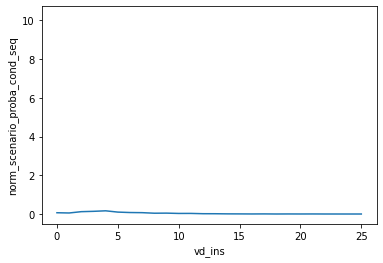

In [7]:
da_total_ins = mdl.get_P_from_scenarios_cols(df_scenarios, ['vd_ins'])
fig, ax = plt.subplots()
da_total_ins.plot(ax=ax)
ax.plot(mean_insertions)
da_total_ins.sum()

In [8]:
df_scenarios['total_deletions'] = mdl.get_observable_from_df_scenarios(f_total_deletions, df_scenarios)
df_scenarios.head()

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq,total_insertions,total_deletions
seq_index,,,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801,11,27
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079,12,28
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045,12,28
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024,12,28
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022,13,29


### Joint probability of two observables

IgorModel.get_P_from_scenarios_cols method

<xarray.DataArray 'norm_scenario_proba_cond_seq' ()>
array(1.)

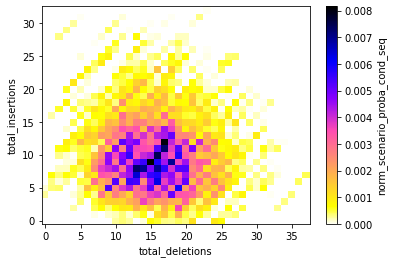

In [9]:
da_ins_dels = mdl.get_P_from_scenarios_cols(df_scenarios, ['total_insertions', 'total_deletions'])
da_ins_dels.plot(cmap='gnuplot2_r')
da_ins_dels.sum()

with any other column

<xarray.DataArray 'norm_scenario_proba_cond_seq' ()>
array(1.)

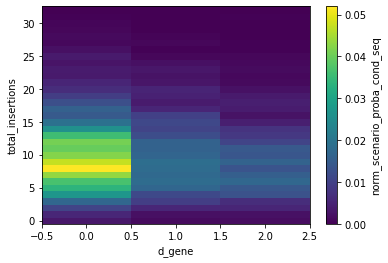

In [10]:
da_totins_vchoice = mdl.get_P_from_scenarios_cols(df_scenarios, ['total_insertions', 'd_gene'])
da_totins_vchoice.plot()
da_totins_vchoice.sum()


### Correlations

#### Correlation between vd_ins and dj_ins
corr(x,y) = (wE(xy) - wE(x)wE(y))/(sigma_x*sigma_y)

In [11]:
def x_times_y(ps_scenario):
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    return vd_ins.value*dj_ins.value

def x_value(ps_scenario):
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    return vd_ins.value

def y_value(ps_scenario):
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    return dj_ins.value

def x2_value(ps_scenario):
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    return vd_ins.value*vd_ins.value

def y2_value(ps_scenario):
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    return dj_ins.value*dj_ins.value


### w_average_function_df_scenarios

In [12]:
%%time
mean_x_times_y = mdl.w_average_function_df_scenarios(x_times_y, df_scenarios)
mean_x = mdl.w_average_function_df_scenarios(x_value, df_scenarios)
mean_y = mdl.w_average_function_df_scenarios(y_value, df_scenarios)
var_x = mdl.w_average_function_df_scenarios(x2_value, df_scenarios) - mean_x**2
var_y = mdl.w_average_function_df_scenarios(y2_value, df_scenarios) - mean_y**2
corr_xy = (mean_x_times_y - mean_x*mean_y)/(np.sqrt(var_x)*np.sqrt(var_y))
print(mean_x_times_y, mean_x, mean_y, var_x, var_y)
print(corr_xy)

25.985685213409095 5.13059790393723 5.071839522387789 14.255598005601755 13.798670395258743
-0.002558524732545709
CPU times: user 6.42 s, sys: 3.13 ms, total: 6.42 s
Wall time: 6.42 s


#### Add value directly as a column in df_scenarios

In [13]:
%%time
df_scenarios['vd_ins_value'] = mdl.get_realization_value_from_df_scenarios(df_scenarios, 'vd_ins') # mdl.get_observable_from_df_scenarios(lambda x: mdl.realization(x, 'vd_ins').value, df_scenarios)
df_scenarios['dj_ins_value'] = mdl.get_realization_value_from_df_scenarios(df_scenarios, 'dj_ins')
var_vd = mdl.w_variance_df_scenarios('vd_ins_value', df_scenarios)
var_dj = mdl.w_variance_df_scenarios('dj_ins_value', df_scenarios)

covar = mdl.w_covariance_df_scenarios('vd_ins_value', 'dj_ins_value', df_scenarios)
corr_xy_2 = covar/np.sqrt(var_vd*var_dj)
print(covar, var_vd, var_dj)
print(corr_xy_2)

-0.03588400925968965 14.255598005601765 13.798670395258743
-0.0025585247325452293
CPU times: user 2.2 s, sys: 0 ns, total: 2.2 s
Wall time: 2.2 s


In [14]:
var_vd = mdl.w_variance_df_scenarios('total_deletions', df_scenarios)
var_dj = mdl.w_variance_df_scenarios('total_insertions', df_scenarios)
covar = mdl.w_covariance_df_scenarios('total_deletions', 'total_insertions', df_scenarios)
corr_xy_2 = covar/np.sqrt(var_vd*var_dj)
print(covar, var_vd, var_dj)
print(corr_xy_2)

-1.9861794910633392 30.440680512950113 27.98250038234113
-0.06805312227837719


In [15]:
df_scenarios.head()

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq,total_insertions,total_deletions,vd_ins_value,dj_ins_value
seq_index,,,,,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801,11,27,4,7
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079,12,28,4,8
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045,12,28,5,7
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024,12,28,5,7
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022,13,29,6,7


### Getting dataframe of realizations

In [16]:
df_v_choice = mdl.get_df_realizations(df_scenarios, 'v_choice')
df_v_choice.head()

,id,value,name
seq_index,,,
998,77,GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCGCAAAGAGGG...,L36092|TRBV7-4*01|Homo sapiens|F|V-REGION|2700...
998,77,GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCGCAAAGAGGG...,L36092|TRBV7-4*01|Homo sapiens|F|V-REGION|2700...
998,77,GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCGCAAAGAGGG...,L36092|TRBV7-4*01|Homo sapiens|F|V-REGION|2700...
998,77,GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCGCAAAGAGGG...,L36092|TRBV7-4*01|Homo sapiens|F|V-REGION|2700...
998,77,GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCGCAAAGAGGG...,L36092|TRBV7-4*01|Homo sapiens|F|V-REGION|2700...


In [17]:
df_vd_dinucl = mdl.get_df_realizations(df_scenarios, 'vd_dinucl')
df_vd_dinucl.head()

TypeError: unhashable type: 'list'

In [18]:
df_vd_dinucl = mdl.get_df_realizations_dinucl(df_scenarios, 'vd_dinucl')
df_vd_dinucl.head()

,id,value,name
seq_index,,,
998,"[1, 1, 2, 3]","[C, C, G, T]","[, , , ]"
998,"[1, 1, 2, 3]","[C, C, G, T]","[, , , ]"
998,"[1, 1, 2, 3, 2]","[C, C, G, T, G]","[, , , , ]"
998,"[1, 1, 1, 2, 3]","[C, C, C, G, T]","[, , , , ]"
998,"[1, 1, 2, 3, 2, 0]","[C, C, G, T, G, A]","[, , , , , ]"


In [19]:
df_vd_dinucl.value

seq_index
998                [C, C, G, T]
998                [C, C, G, T]
998             [C, C, G, T, G]
998             [C, C, C, G, T]
998          [C, C, G, T, G, A]
                 ...           
703          [G, G, C, A, T, T]
703             [G, C, A, T, T]
703             [G, C, A, T, T]
703    [G, G, C, A, T, T, G, C]
703    [G, C, A, T, T, G, C, G]
Name: value, Length: 10000, dtype: object

In [20]:
df_realizations = mdl.get_df_realizations_dinucl(df_scenarios, 'vd_dinucl')
vd_seq = df_realizations.value.apply(lambda x: "".join(x))
vd_seq

seq_index
998        CCGT
998        CCGT
998       CCGTG
998       CCCGT
998      CCGTGA
         ...   
703      GGCATT
703       GCATT
703       GCATT
703    GGCATTGC
703    GCATTGCG
Name: value, Length: 10000, dtype: object

In [21]:
vd_counts = vd_seq.value_counts()
vd_counts

                 539
C                159
T                132
G                128
A                118
                ... 
TAGGCCGAATCCC      1
GAATACG            1
AACCTTGAGGCAT      1
ATACCT             1
GCCG               1
Name: value, Length: 2425, dtype: int64

In [22]:
vd_counts.loc['AG']

82

<AxesSubplot:>

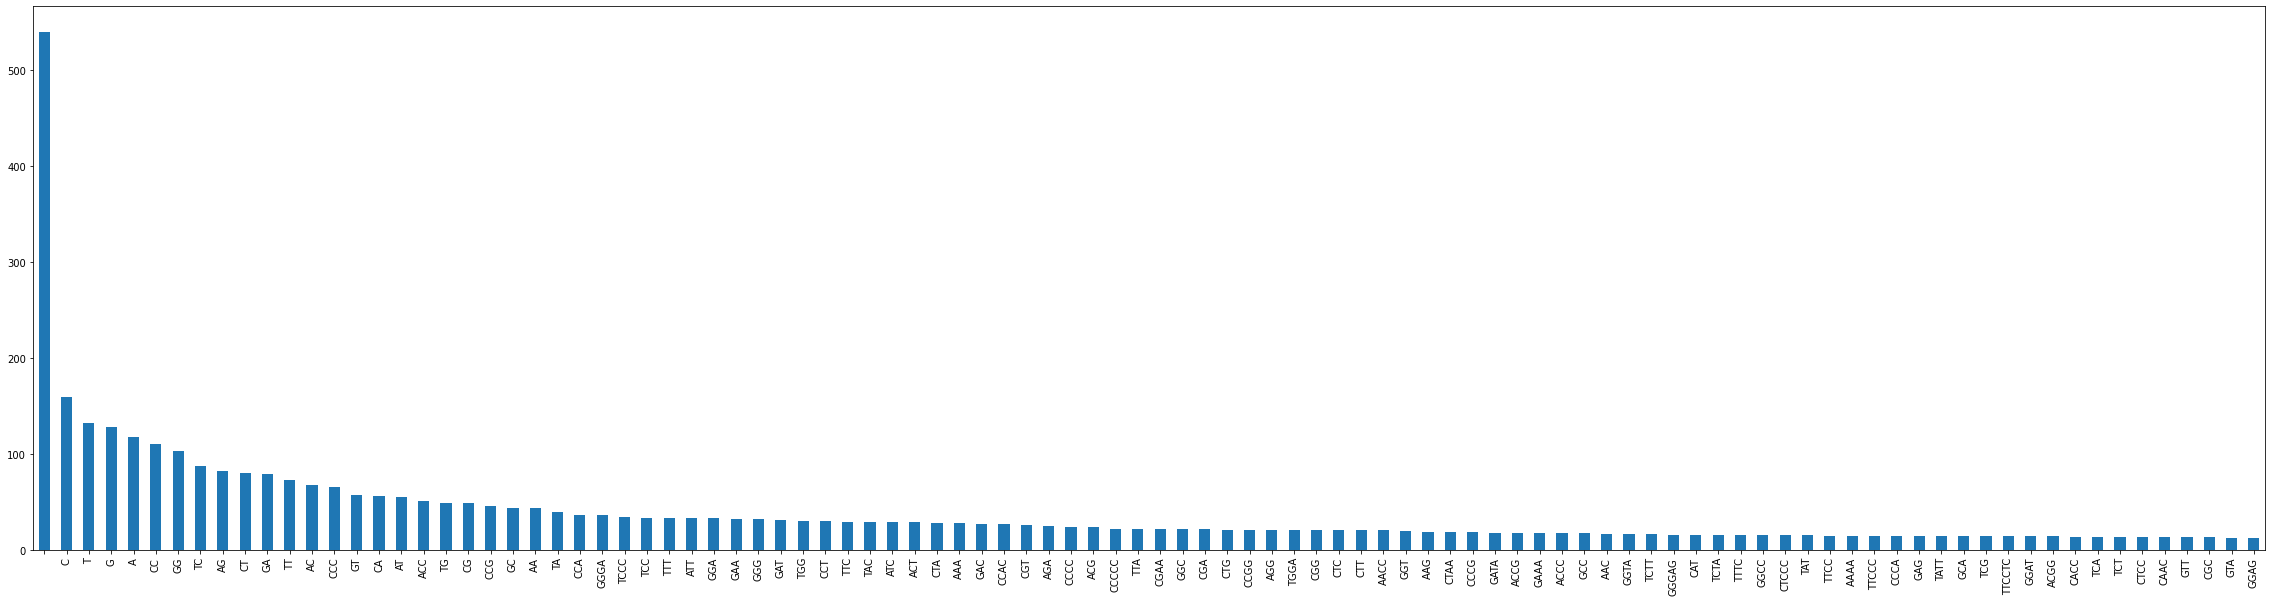

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,10))
# ax.set_yscale('log')
vd_counts.head(100).plot.bar(ax)

In [24]:
df_scenarios['vd_seq'] = vd_seq
df_scenarios.head()

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq,total_insertions,total_deletions,vd_ins_value,dj_ins_value,vd_seq
seq_index,,,,,,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801,11,27,4,7,CCGT
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079,12,28,4,8,CCGT
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045,12,28,5,7,CCGTG
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024,12,28,5,7,CCCGT
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022,13,29,6,7,CCGTGA


In [25]:
dfff = mdl.get_P_marginal_from_df_scenarios_cols(df_scenarios, ['vd_seq'] )
dfff

vd_seq
             0.065748
A            0.011515
AA           0.004740
AAA          0.003144
AAAA         0.001587
               ...   
TTTTGGGG     0.000081
TTTTT        0.000175
TTTTTCCCC    0.000033
TTTTTT       0.000075
TTTTTTA      0.000333
Name: norm_scenario_proba_cond_seq, Length: 2425, dtype: float64

<AxesSubplot:xlabel='vd_seq'>

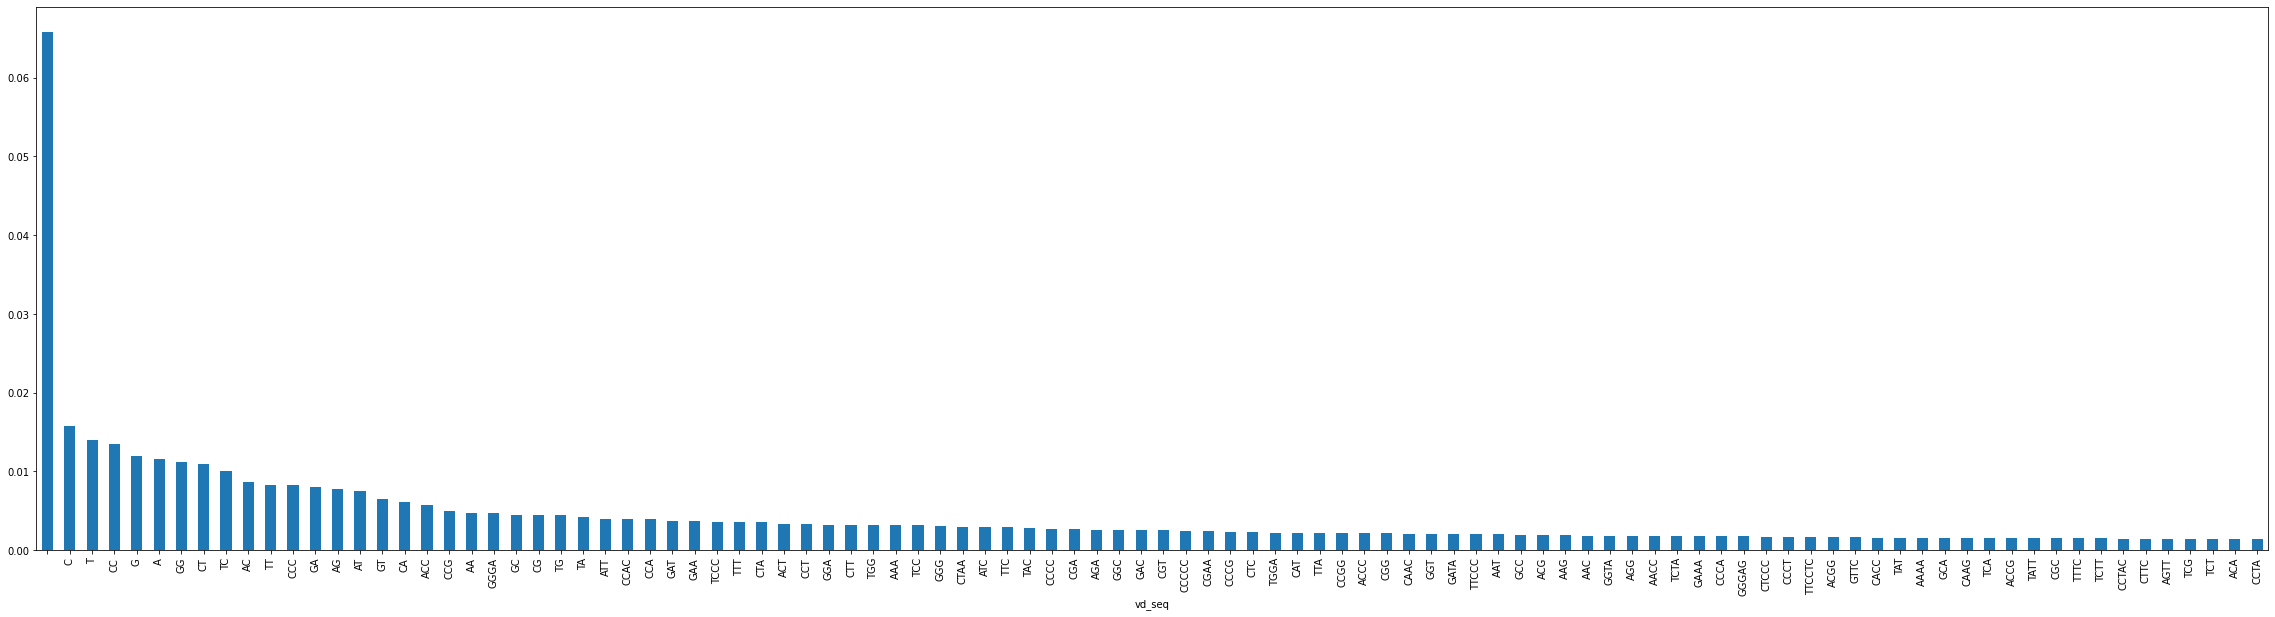

In [26]:
fig, ax = plt.subplots(figsize=(40,10))
dfff.sort_values(ascending=False).head(100).plot.bar(ax=ax)

In [27]:
da_vd_dinucl = mdl['vd_dinucl']
da_vd_dinucl

<xarray.DataArray (x: 4, y: 4)>
array([[0.286419, 0.263224, 0.259478, 0.190879],
       [0.157297, 0.450881, 0.188509, 0.203313],
       [0.2482  , 0.182679, 0.364632, 0.204489],
       [0.235502, 0.308925, 0.191993, 0.26358 ]])
Coordinates:
  * x        (x) int64 0 1 2 3
    lbl__x   (x) object 'A' 'C' 'G' 'T'
  * y        (y) int64 0 1 2 3
    lbl__y   (y) object 'A' 'C' 'G' 'T'
Attributes:
    nickname:    vd_dinucl
    event_type:  DinucMarkov
    seq_type:    VD_genes
    seq_side:    Undefined_side
    priority:    3
    parents:     []
    childs:      []

### Shannon entropy

In [28]:
df_scenarios.head()

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,norm_scenario_proba_cond_seq,total_insertions,total_deletions,vd_ins_value,dj_ins_value,vd_seq
seq_index,,,,,,,,,,,,,,,,,,,,
998,1,0.783497,77,4,0,9,6,19,9,4,"[1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000801,11,27,4,7,CCGT
998,2,0.076884,77,4,0,9,6,19,10,4,"[1, 1, 2, 3]",8,"[2, 2, 2, 2, 0, 2, 0, 2]",[],0.000079,12,28,4,8,CCGT
998,3,0.043634,77,4,0,9,7,19,9,5,"[1, 1, 2, 3, 2]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000045,12,28,5,7,CCGTG
998,4,0.023517,77,4,0,10,6,19,9,5,"[1, 1, 1, 2, 3]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000024,12,28,5,7,CCCGT
998,5,0.021809,77,4,0,9,8,19,9,6,"[1, 1, 2, 3, 2, 0]",7,"[2, 2, 2, 2, 0, 2, 0]",[],0.000022,13,29,6,7,CCGTGA


In [29]:
df_marginal_v_choice = mdl.get_P_marginal_from_df_scenarios_cols(df_scenarios, ['v_choice'] )
df_marginal_v_choice

v_choice
0     0.003
1     0.010
2     0.008
3     0.006
4     0.001
      ...  
83    0.002
84    0.001
85    0.004
86    0.005
88    0.017
Name: norm_scenario_proba_cond_seq, Length: 67, dtype: float64

In [30]:
np.log(df_marginal_v_choice)

v_choice
0    -5.809143
1    -4.605170
2    -4.828314
3    -5.115996
4    -6.907755
        ...   
83   -6.214608
84   -6.907755
85   -5.521461
86   -5.298317
88   -4.074542
Name: norm_scenario_proba_cond_seq, Length: 67, dtype: float64

In [31]:
H_v_choice = -df_marginal_v_choice.dot(np.log(df_marginal_v_choice))
H_v_choice

3.588090298108314

In [68]:
nickname_event_list = ['v_choice', 'j_choice', 'd_gene']
nickname_event_list = mdl.Pmarginal.keys()
for nickname_event in nickname_event_list:
    # nickname_event = 'v_choice'
    P_nickname_event = mdl.Pmarginal[nickname_event]
    log_P_nickname_event = np.log(P_nickname_event)
    # print(P_v_choice)
    print('-'*50, nickname_event)
    # print(log_P_v_choice)
    log_P_nickname_event[log_P_nickname_event==-np.inf] = 0
    H = - P_nickname_event.dot(log_P_nickname_event)
    print(nickname_event, H.values)

-------------------------------------------------- v_choice
v_choice 3.6410426918638303
-------------------------------------------------- j_choice
j_choice 2.5556353293199088
-------------------------------------------------- d_gene
d_gene 0.9883038337943308
-------------------------------------------------- v_3_del
v_3_del 2.413368909724714
-------------------------------------------------- d_5_del
d_5_del 2.7039051916375234
-------------------------------------------------- d_3_del
d_3_del 2.5370173546821615
-------------------------------------------------- j_5_del
j_5_del 2.5447835111379606
-------------------------------------------------- vd_ins
vd_ins 2.621226265420951
-------------------------------------------------- vd_dinucl


/home/olivares/anaconda3/envs/pygor3-dev/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/pygor3-dev/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/pygor3-dev/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


IndexError: 2-dimensional boolean indexing is not supported. 

In [61]:
mdl.xdata['j_choice']

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[1.28586e-01, 1.04003e-01, 4.10916e-02, ..., 0.00000e+00,
        5.36364e-02, 3.73186e-02],
       [1.66126e-01, 7.89615e-02, 1.13701e-02, ..., 2.46074e-02,
        6.49049e-02, 7.46140e-02],
       [1.66156e-01, 7.90103e-02, 1.13744e-02, ..., 2.45354e-02,
        6.49334e-02, 7.46554e-02],
       ...,
       [1.24050e-01, 4.76394e-02, 0.00000e+00, ..., 3.52196e-02,
        5.51254e-02, 6.01472e-02],
       [3.64941e-06, 2.04721e-09, 0.00000e+00, ..., 3.41728e-01,
        6.84855e-02, 8.22442e-02],
       [1.06077e-01, 1.13773e-01, 4.03129e-02, ..., 2.20679e-02,
        7.16947e-02, 5.81105e-02]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION...
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     ['v_choice']
    childs:      ['j_5_del', 'd_gene']

In [ ]:
def f_log(ps_scenario):
    my_internal = np.zeros(len(mdl.parms['vd_ins']))
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    # my_internal[vd_ins.id] = 1
    # return my_internal 
    return vd_ins.value + dj_ins.value
